<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Ibm-datascience/blob/main/chi_square_test_of_independence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.5 MB/s eta 0:00:00


In [8]:
import pandas as pd
import pingouin
import numpy as np
import matplotlib.pyplot as plt

In [5]:
late_shipment = pd.read_feather('/content/late_shipments.feather')
print(late_shipment)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

## Hypothesis
H0:vendor_inco_term and freight_cost_group are independent.

HA: vendor_inco_term and freight_cost_group are associated.



## Vendor_inco_term vs freight_cost_group

In [6]:
props = late_shipment.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()
print(props)

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64


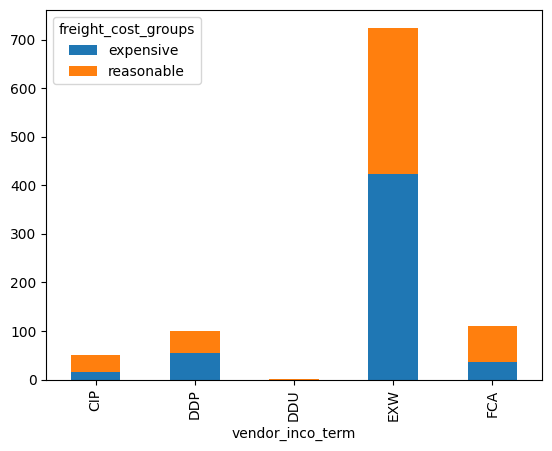

In [9]:
# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar',stacked=True)
plt.show()

In [11]:
#Chi_test
expected, observed, stats = pingouin.chi2_independence(data=late_shipment,x='freight_cost_groups',y='vendor_inco_term',correction=False)
print(stats[stats['test'] == 'pearson'])

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8073: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8073: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8070: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


Summary: Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated since pvalue is smaller than alpha.
